In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler


# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import classification_report

# Warnings
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

import NA_outliers as n
import play_song as song
import feature_selection as fs

In [81]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('______________________________________________________________________')
    print('                                TRAIN                                 ')
    print('----------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))



    print('______________________________________________________________________')
    print('                                VALIDATION                                 ')
    print('----------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))

In [82]:
df = pd.read_csv('./project_data/out_eda1.csv',
                 index_col = 'Claim Identifier')

**Train-Test Split**

In [83]:
X, y = df.drop('Claim Injury Type', axis=1), df['Claim Injury Type'] 

In [84]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify = y)


**Missing Values**

In [85]:
n.custom_impute(X_train)
n.custom_impute(X_val)

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5730729,51.0,571411.0,1.0,0.00,1969.0,111144.0,111144.0,53207.0,0.0,270778.0,1.0,1.0,92.0,265981.0,29.0,52.0,56.0,11229.0,0.0,2021.0,5.0,18.0,2021,5,25,2021.0,5.0,25.0,1,0
6038049,27.0,571411.0,0.0,0.00,1994.0,111144.0,111144.0,53207.0,0.0,270778.0,1.0,0.0,72.0,265981.0,68.0,7.0,11.0,11230.0,0.0,2022.0,4.0,9.0,2022,7,15,2022.0,7.0,15.0,0,0
6053557,29.0,571411.0,1.0,598.72,1993.0,4857.0,285367.0,17450.0,0.0,86171.0,1.0,1.0,62.0,53654.0,60.0,52.0,55.0,10941.0,1.0,2022.0,8.0,1.0,2022,8,4,2022.0,8.0,4.0,0,2022
5953832,51.0,571411.0,0.0,0.00,1970.0,6498.0,285367.0,9125.0,0.0,270778.0,0.0,0.0,32.0,53654.0,60.0,36.0,38.0,10901.0,2.0,2022.0,1.0,21.0,2022,3,28,2022.0,3.0,28.0,0,2022
5488869,53.0,571411.0,1.0,606.29,1966.0,177.0,121920.0,13665.0,0.0,86171.0,0.0,3.0,92.0,135885.0,53.0,52.0,53.0,12020.0,3.0,2020.0,5.0,22.0,2020,5,28,2020.0,5.0,28.0,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731119,39.0,571411.0,0.0,910.34,1981.0,4571.0,121920.0,1884.0,0.0,21864.0,0.0,0.0,92.0,135885.0,66.0,28.0,44.0,12455.0,3.0,2021.0,5.0,21.0,2021,5,26,2021.0,5.0,26.0,0,0
5750072,37.0,571411.0,1.0,0.00,1983.0,111144.0,111144.0,58333.0,0.0,270778.0,1.0,0.0,23.0,265981.0,32.0,90.0,42.0,0.0,0.0,2021.0,2.0,17.0,2021,6,23,2021.0,6.0,25.0,1,0
5974275,45.0,571411.0,0.0,0.00,1976.0,260.0,121920.0,11530.0,0.0,86171.0,0.0,0.0,92.0,85033.0,68.0,10.0,53.0,12533.0,4.0,2022.0,4.0,20.0,2022,4,22,2022.0,4.0,22.0,0,0


**Num-Categ Split**

In [114]:
num = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents',
       'Accident Year', 'Accident Month', 'Accident Day', 'Assembly Year', 'Assembly Month', 'Assembly Day',
       'C-2 Year', 'C-2 Month', 'C-2 Day', 'First Hearing Year']

categ = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'Carrier Type',
         'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
         'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
         'WCIO Part Of Body Code', 'Zip Code', 'C-3 Date Binary' ]

**Log**

In [88]:
n.log_transform(X_train[num])
n.log_transform(X_val[num])

array([[ 0.33024169,  0.        , -0.39130435, ..., -0.33333333,
         0.51082562,  0.        ],
       [-0.65217391,  0.        ,  0.52806743, ...,  0.        ,
         0.        ,  0.        ],
       [-0.56521739,  0.54557065,  0.50209194, ...,  0.15415068,
        -0.73333333,  0.69364211],
       ...,
       [ 0.12260232,  0.        , -0.08695652, ..., -0.5       ,
         0.38299225,  0.        ],
       [ 0.6257059 ,  0.79713694, -0.91304348, ..., -0.83333333,
        -0.13333333,  0.69314718],
       [ 0.39086631,  0.        , -0.47826087, ..., -0.5       ,
         0.65924563,  0.        ]])

**Scale**

In [87]:
scaler = RobustScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_val[num] = scaler.fit_transform(X_val[num])

**Feature Selection**

*Numeric*

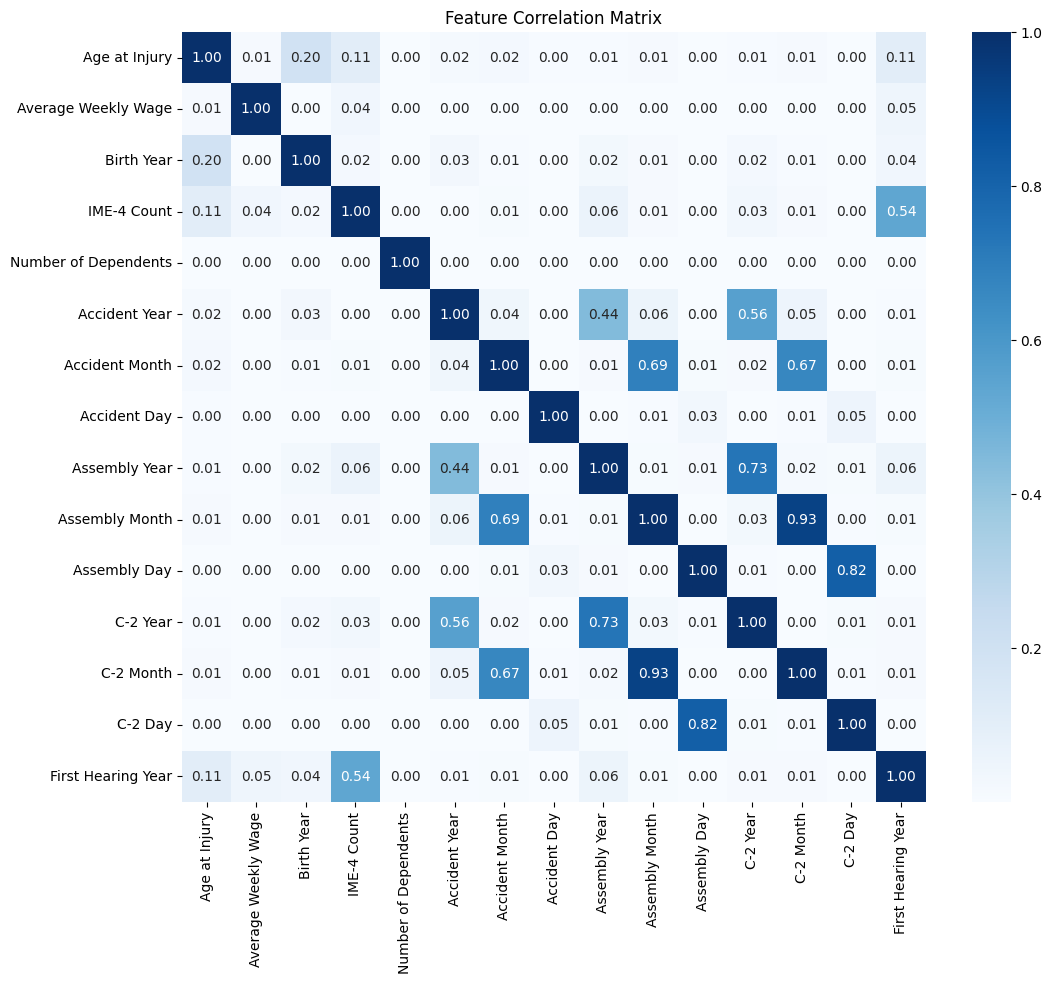

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents',
 'Accident Year',
 'Accident Month',
 'Accident Day',
 'Assembly Year',
 'Assembly Month',
 'Assembly Day',
 'C-2 Year',
 'C-2 Day',
 'First Hearing Year']

In [115]:
fs.correlation_matrix(X_train, num, threshold=0.9)

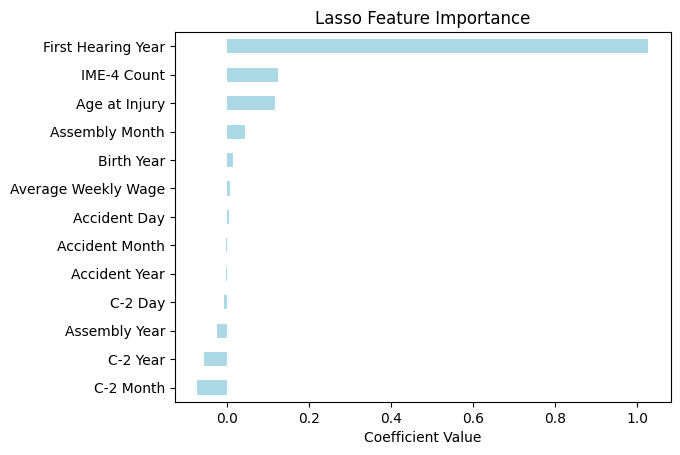

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Accident Year',
 'Accident Month',
 'Accident Day',
 'Assembly Year',
 'Assembly Month',
 'C-2 Year',
 'C-2 Month',
 'C-2 Day',
 'First Hearing Year']

In [120]:
fs.lasso(X_train, y_train, num, alpha = 0.0001, color = 'lightblue')

In [126]:
n_features = [12,13,14,15]
fs.rfe(X_train, y_train, num, n_features, 
       model = LogisticRegression())

Trying with 12 features: 12 selected features.
Classification Report for 12 features:
              precision    recall  f1-score   support

           1       0.18      0.00      0.01      9981
           2       0.81      0.98      0.88    232862
           3       0.31      0.04      0.07     55125
           4       0.62      0.86      0.72    118806
           5       0.58      0.06      0.10     38624
           6       0.00      0.00      0.00      3369
           7       0.00      0.00      0.00        77
           8       0.00      0.00      0.00       376

    accuracy                           0.73    459220
   macro avg       0.31      0.24      0.22    459220
weighted avg       0.66      0.73      0.65    459220

Trying with 13 features: 13 selected features.
Classification Report for 13 features:
              precision    recall  f1-score   support

           1       0.19      0.00      0.01      9981
           2       0.81      0.98      0.88    232862
           3  

{12: Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
        'Accident Year', 'Assembly Year', 'Assembly Month', 'Assembly Day',
        'C-2 Year', 'C-2 Month', 'C-2 Day', 'First Hearing Year'],
       dtype='object'),
 13: Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
        'Accident Year', 'Accident Month', 'Assembly Year', 'Assembly Month',
        'Assembly Day', 'C-2 Year', 'C-2 Month', 'C-2 Day',
        'First Hearing Year'],
       dtype='object'),
 14: Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
        'Accident Year', 'Accident Month', 'Accident Day', 'Assembly Year',
        'Assembly Month', 'Assembly Day', 'C-2 Year', 'C-2 Month', 'C-2 Day',
        'First Hearing Year'],
       dtype='object'),
 15: Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
        'Number of Dependents', 'Accident Year', 'Accident Month',
        'Accident Day', 'Assembly Year',

In [127]:
fs.rfe(X_train, y_train, num, n_features, 
       model = RandomForestClassifier())

KeyboardInterrupt: 

In [ ]:
song.play_('audio.mp3')

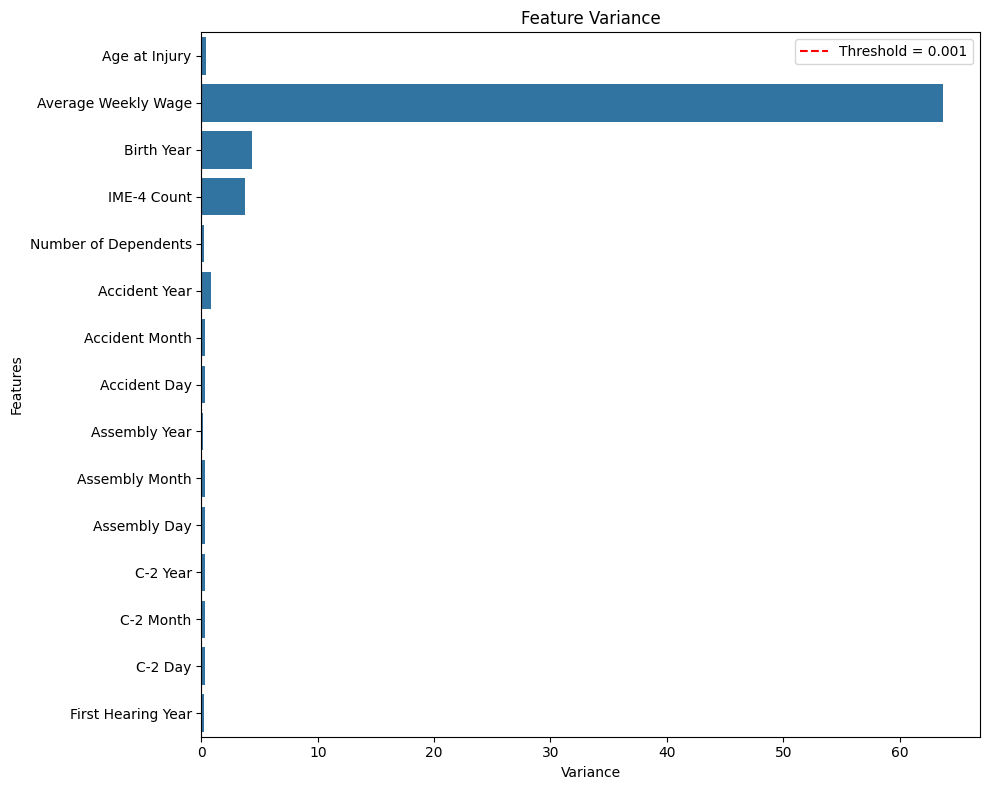

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents',
 'Accident Year',
 'Accident Month',
 'Accident Day',
 'Assembly Year',
 'Assembly Month',
 'Assembly Day',
 'C-2 Year',
 'C-2 Month',
 'C-2 Day',
 'First Hearing Year']

In [128]:
fs.var(X_train, num, threshold = 0.001)

*Categorical*

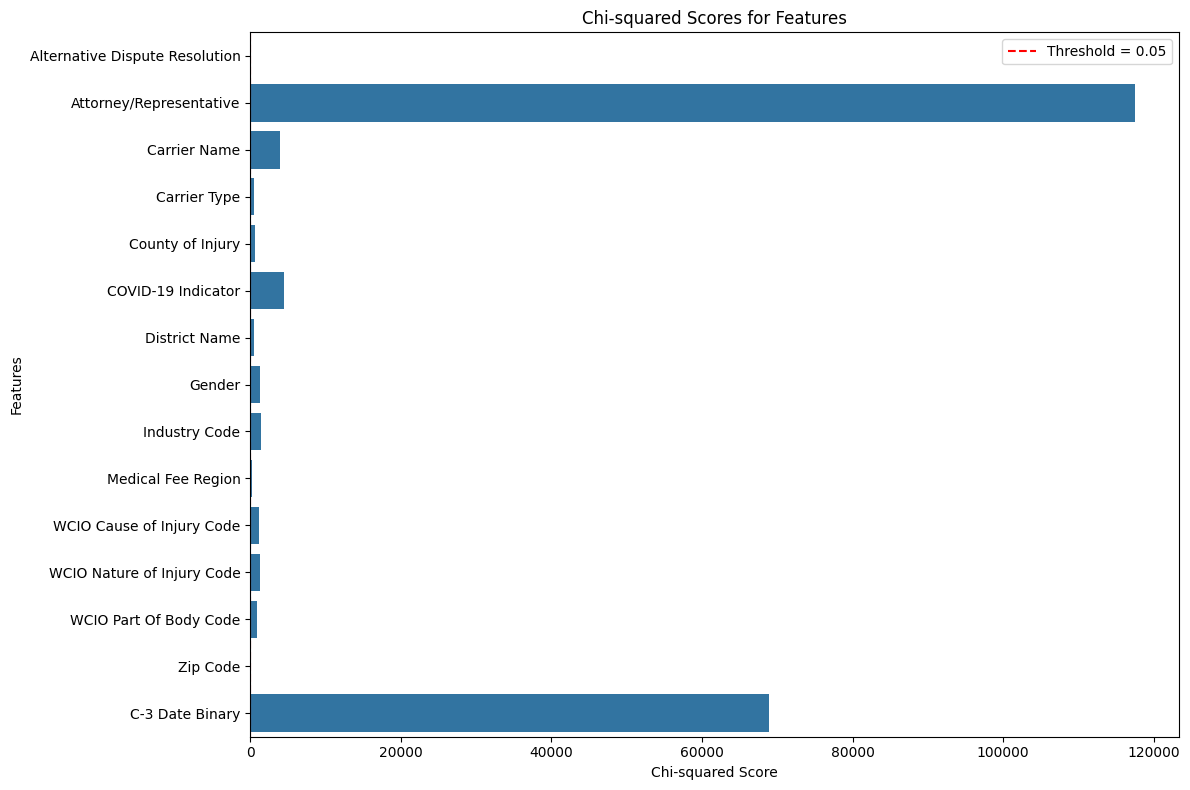

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Industry Code',
 'Medical Fee Region',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Zip Code',
 'C-3 Date Binary']

In [129]:
fs.chi_squared(X_train, y_train, categ, threshold=0.05)

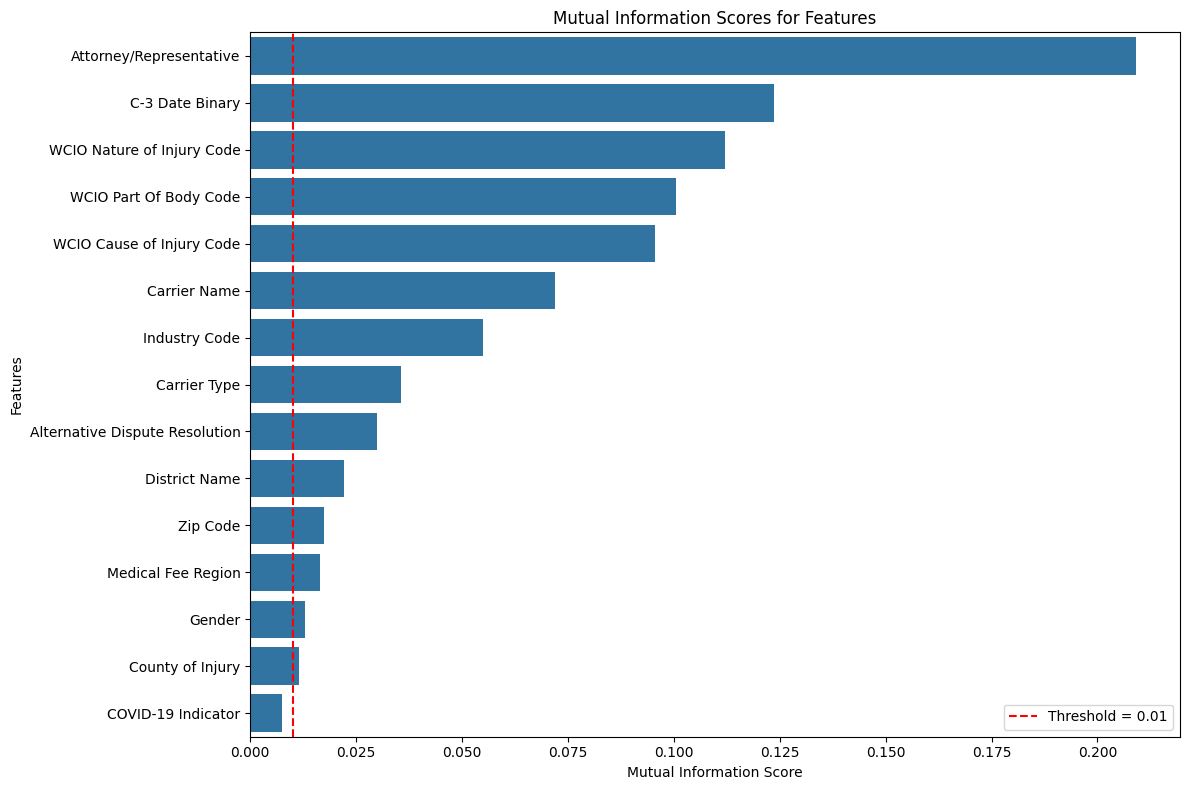

['Attorney/Representative',
 'C-3 Date Binary',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'WCIO Cause of Injury Code',
 'Carrier Name',
 'Industry Code',
 'Carrier Type',
 'Alternative Dispute Resolution',
 'District Name',
 'Zip Code',
 'Medical Fee Region',
 'Gender',
 'County of Injury']

In [130]:
fs.mutual_information(X_train, y_train, categ, threshold=0.01)

*<center>Final Features*

In [ ]:
num_final = []
categ_final = []
try_ = []

X_train = X_train[num_final+categ_final+try_]

**Model**

In [89]:
model = RandomForestClassifier(random_state=42)  
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)

In [91]:
metrics(y_train, train_pred , y_val, val_pred)

______________________________________________________________________
                                TRAIN                                 
----------------------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9981
           2       1.00      1.00      1.00    232862
           3       1.00      1.00      1.00     55125
           4       1.00      1.00      1.00    118806
           5       1.00      1.00      1.00     38624
           6       1.00      1.00      1.00      3369
           7       1.00      1.00      1.00        77
           8       1.00      1.00      1.00       376

    accuracy                           1.00    459220
   macro avg       1.00      1.00      1.00    459220
weighted avg       1.00      1.00      1.00    459220

______________________________________________________________________
                                VALIDATION                       

**Hyperparameter Tuning**

In [92]:
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [93]:
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_distributions,
                                   n_iter=10, 
                                   cv=2,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

In [94]:
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated 

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated 

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.8min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time= 1.8min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.8min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time= 1.8min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time= 2.0min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time= 2.0min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time= 2.0min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time= 2.0min
[CV] END max_depth=10, max_features=sqrt

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [95]:
song.play_('audio.mp3')

Input #0, wav, from '/var/folders/mm/fxsq_1490x9dd2w76tqvt3kr0000gn/T/tmpci3j7s2n.wav':
  Duration: 00:00:10.00, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


In [96]:
best_model = random_search.best_estimator_

train_pred_best = best_model.predict(X_train)
val_pred_best = best_model.predict(X_val)

[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 1.7min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.3min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 1.7min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.3min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.6min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 1.5min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.6min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 1.5min
[CV] END max_depth=30, max_features=sqrt

In [97]:
metrics(y_train, train_pred_best , y_val, val_pred_best)

______________________________________________________________________
                                TRAIN                                 
----------------------------------------------------------------------
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 3.8min
              precision    recall  f1-score   support

           1       0.90      0.59      0.71      9981
           2       0.88      0.98      0.93    232862
           3       0.97      0.30      0.46     55125
           4       0.81      0.97      0.88    118806
           5       0.93      0.83      0.88     38624
           6       1.00      0.01      0.03      3369
           7       0.00      0.00      0.00        77
           8       0.98      0.14      0.24       376

    accuracy                           0.87    459220
   macro avg       0.81      0.48      0.52    459220
weighted avg       0.88      0.87      0.85    459220

________________

**Test**

In [98]:
test = pd.read_csv('./project_data/test_treated.csv', 
                   index_col = 'Claim Identifier')

test

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,19,386314,0,0.0,2003.0,7573,201827,28048,0,187972,0,0.0,48.0,182276,31.0,10.0,54.0,10466,1,2022.0,12.0,24.0,2023,1,2,2023.0,1.0,2.0,0,0
6166141,19,386314,0,0.0,2003.0,7096,201827,40358,0,187972,1,0.0,45.0,182276,75.0,10.0,10.0,11691,1,2022.0,11.0,20.0,2023,1,2,2023.0,1.0,2.0,0,0
6165907,59,386314,0,0.0,1963.0,143,201827,17586,0,187972,1,0.0,56.0,34679,68.0,49.0,62.0,10604,0,2022.0,12.0,26.0,2023,1,2,2022.0,12.0,31.0,0,0
6166047,55,386314,0,0.0,1967.0,12863,201827,40358,0,187972,1,0.0,48.0,182276,25.0,10.0,53.0,11411,6,2022.0,12.0,28.0,2023,1,2,2023.0,1.0,2.0,0,0
6166102,25,386314,0,0.0,1997.0,2758,201827,35917,0,187972,0,0.0,55.0,182276,79.0,40.0,37.0,11212,5,2022.0,12.0,20.0,2023,1,2,2022.0,12.0,31.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,52,386314,0,0.0,1960.0,66189,66189,1996,0,29537,0,0.0,0.0,91300,0.0,0.0,0.0,13619,5,2012.0,9.0,12.0,2024,6,5,2012.0,10.0,23.0,0,0
6553119,59,386314,1,0.0,1965.0,4418,78948,36664,0,36656,1,0.0,0.0,182276,0.0,0.0,0.0,11776,1,2024.0,5.0,22.0,2024,6,5,2023.0,5.0,16.0,1,0
6553542,45,386314,1,0.0,1979.0,66189,66189,40358,0,187972,0,0.0,0.0,182276,0.0,0.0,0.0,11368,5,2024.0,5.0,6.0,2024,6,5,2023.0,5.0,16.0,0,0


**Predictions**

In [99]:
test['Claim Injury Type'] = model.predict(test)

**Map to Original**

In [100]:
label_mapping = {
    1: "1. CANCELLED",
    2: "2. NON-COMP",
    3: "3. MED ONLY",
    4: "4. TEMPORARY",
    5: "5. PPD SCH LOSS",
    6: "6. PPD NSL",
    7: "7. PTD",
    8: "8. DEATH"
}

test['Claim Injury Type'] = test['Claim Injury Type'].replace(label_mapping)

Check each category inside target

In [101]:
test['Claim Injury Type'].value_counts() 

Claim Injury Type
2. NON-COMP        315623
4. TEMPORARY        53140
3. MED ONLY         15898
1. CANCELLED         2169
5. PPD SCH LOSS      1145
Name: count, dtype: int64

Select only the predictions column and the index

In [102]:
predictions = test['Claim Injury Type']

# 3. Export

In [103]:
predictions.to_csv(f'./predictions/NEXT.csv')

__*<center>Models*__ 

| Model | Feature Selection | Log | Parameters | Kaggle Score | 
| ----- | ------------------ | --- | ---------- | ------------ | 
| RF_simple_randomS | - | - | max_depth=30, min_samples_leaf=4, n_estimators=200 | 0.340652 | 
| ----- | ------------------ | --- | ---------- | ------------ | 
| ----- | ------------------ | --- | ---------- | ------------ | 
| ----- | ------------------ | --- | ---------- | ------------ | 
| ----- | ------------------ | --- | ---------- | ------------ | 
| ----- | ------------------ | --- | ---------- | ------------ | 